In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.shape

(201, 29)

In [5]:
# 1. Linear Regression and Multiple Linear Regression
# Simple Linear Regression
# Simple Linear Regression is a method to help us understand the relationship between two variables:

# The predictor/independent variable (X)
# The response/dependent variable (that we want to predict)(Y)

# The result of Linear Regression is a linear function that predicts the response (dependent) variable as 
# a function of the predictor (independent) variable.

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm


LinearRegression()

In [6]:
# How could "highway-mpg" help us predict car price?
# For this example, we want to look at how highway-mpg can help us predict car price.
# Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor 
# variable and the "price" as the response variable.
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

# We can output a prediction:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [7]:
# What is the value of the intercept (a)?
lm.intercept_

38423.305858157415

In [8]:
# What is the value of the slope (b)?¶
lm.coef_

array([-821.73337832])

In [9]:
# What is the final estimated linear model we get?
# Price = 38423.31 - 821.73 x highway-mpg

# Multiple Linear Regression
# Let's develop a model using these variables as the predictor variables.

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression()

In [10]:
# What is the value of the intercept(a)?
lm.intercept_

-15806.624626329234

In [11]:
# What are the values of the coefficients (b1, b2, b3, b4)?
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [12]:
# What is the linear function we get in this example?

# Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size 
# + 33.58258185 x highway-mpg

In [13]:
# 2. Model Evaluation Using Visualization
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 48161.03397119185)

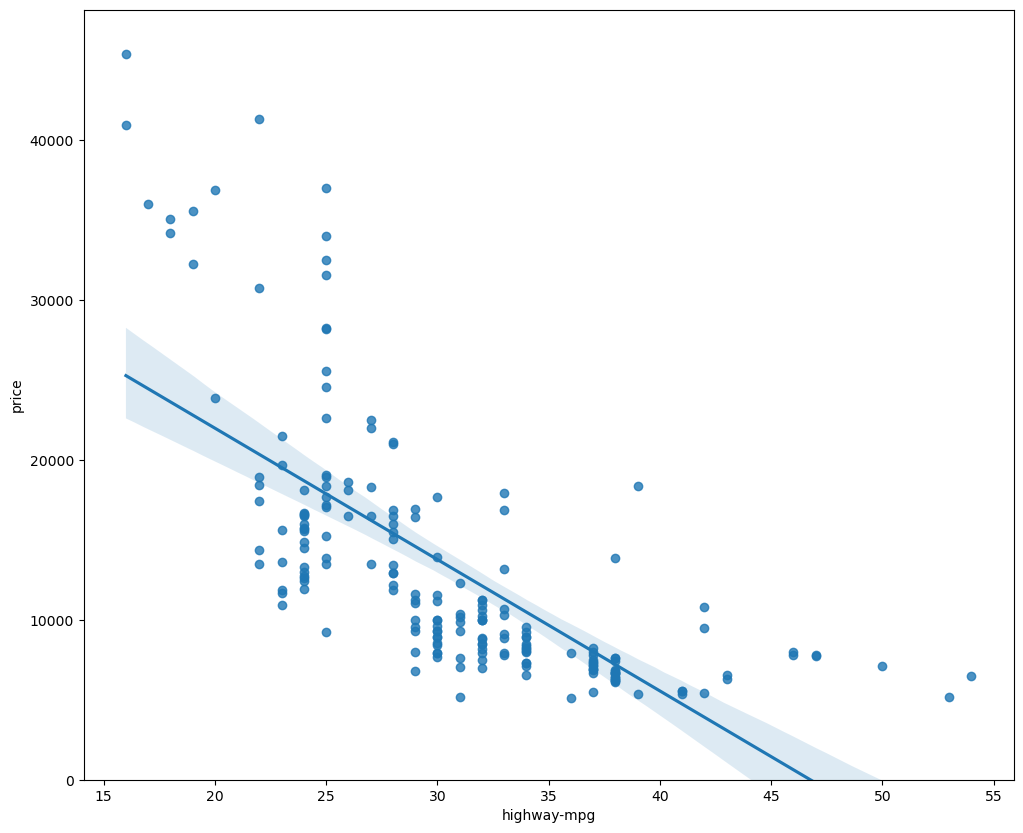

In [14]:
# Regression Plot

# When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using 
# regression plots.

# This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear
# regression line going through the data. This will give us a reasonable estimate of the relationship between 
# the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

# Let's visualize highway-mpg as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

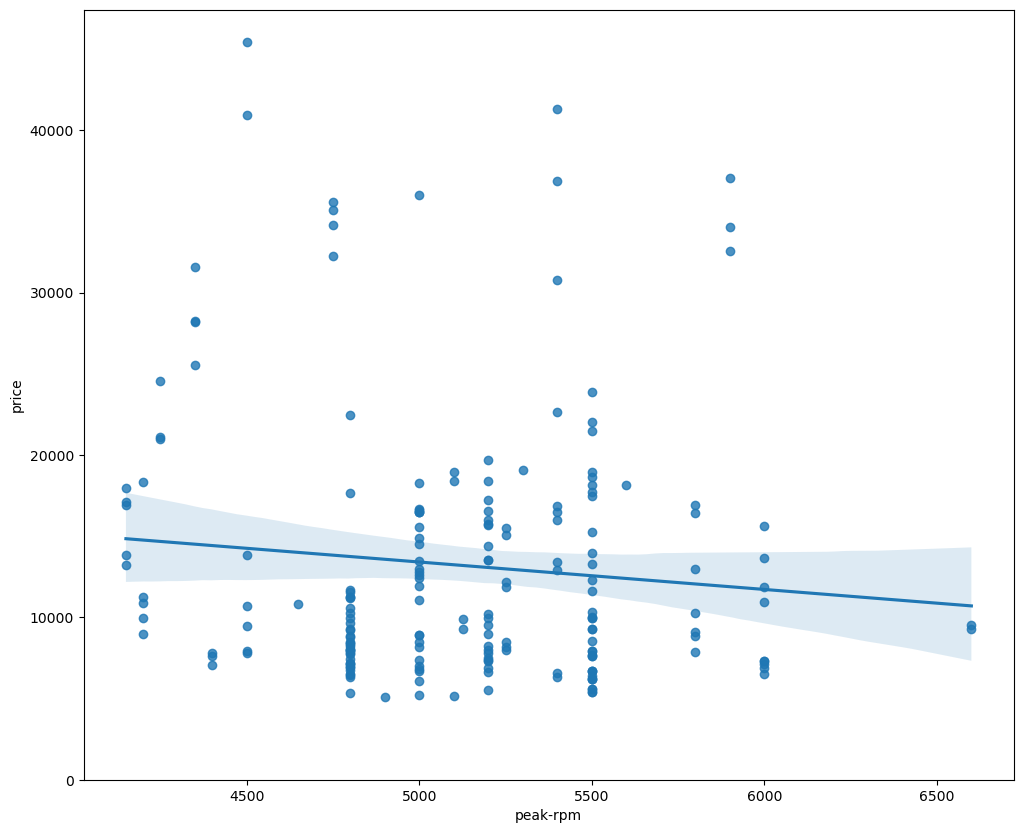

In [15]:
# We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is
# negative.

# One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points
# are around the regression line. This will give you a good indication of the variance of the data and whether a 
# linear model would be the best fit or not. If the data is too far off from the line, this linear model might not 
# be the best model for this data.

# Let's compare this plot to the regression plot of "peak-rpm".
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [16]:
# Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are 
# much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around 
# the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" 
# increases.

# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  
# compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


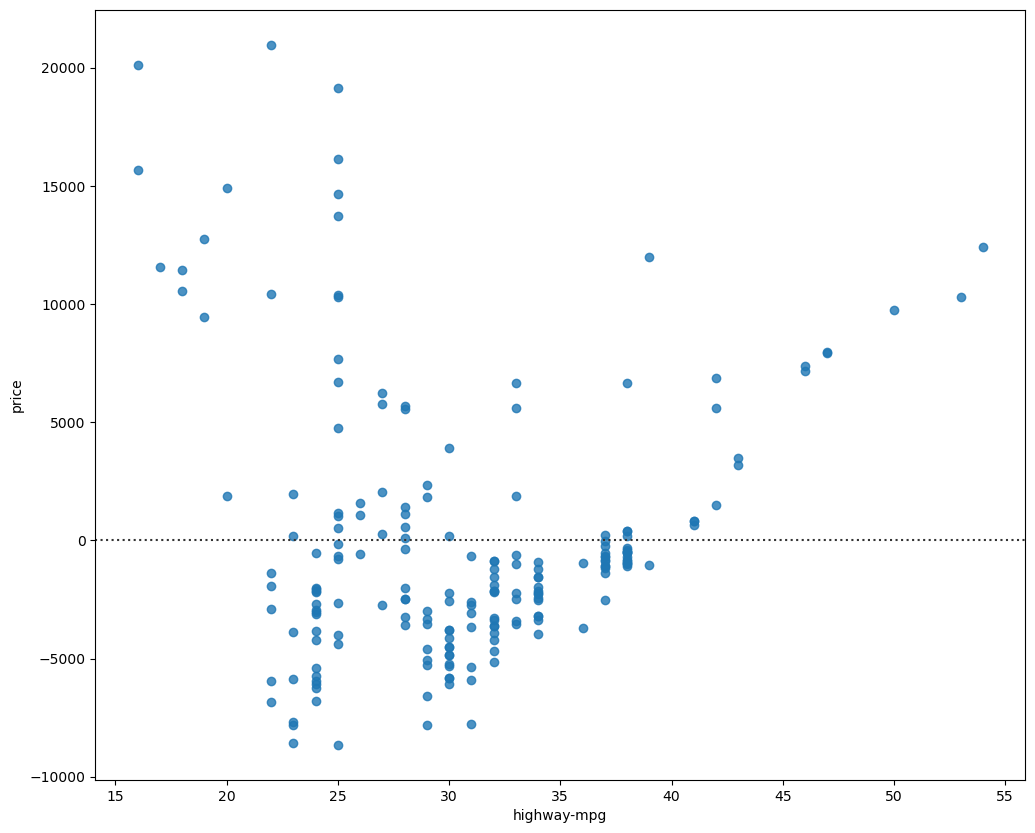

In [17]:
# Residual Plot
# A good way to visualize the variance of the data is to use a residual plot.

# What is a residual?

# The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). 
# When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

# So what is a residual plot?

# A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the
# horizontal x-axis.

# What do we pay attention to when looking at a residual plot?

# We look at the spread of the residuals:

# - If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate
# for the data.

# Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a 
# good fit for this data.

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [18]:
# What is this plot telling us?

# We can see from this residual plot that the residuals are not randomly spread around the x-axis,
# leading us to believe that maybe a non-linear model is more appropriate for this data.

# Multiple Linear Regression

# How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because 
# you can't visualize it with regression or residual plot.

# One way to look at the fit of the model is by looking at the distribution plot. We can look at the
# distribution of the fitted values that result from the model and compare it to the distribution of the 
# actual values.
# First, let's make a prediction:
Y_hat = lm.predict(Z)

/home/lawrence/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/lawrence/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


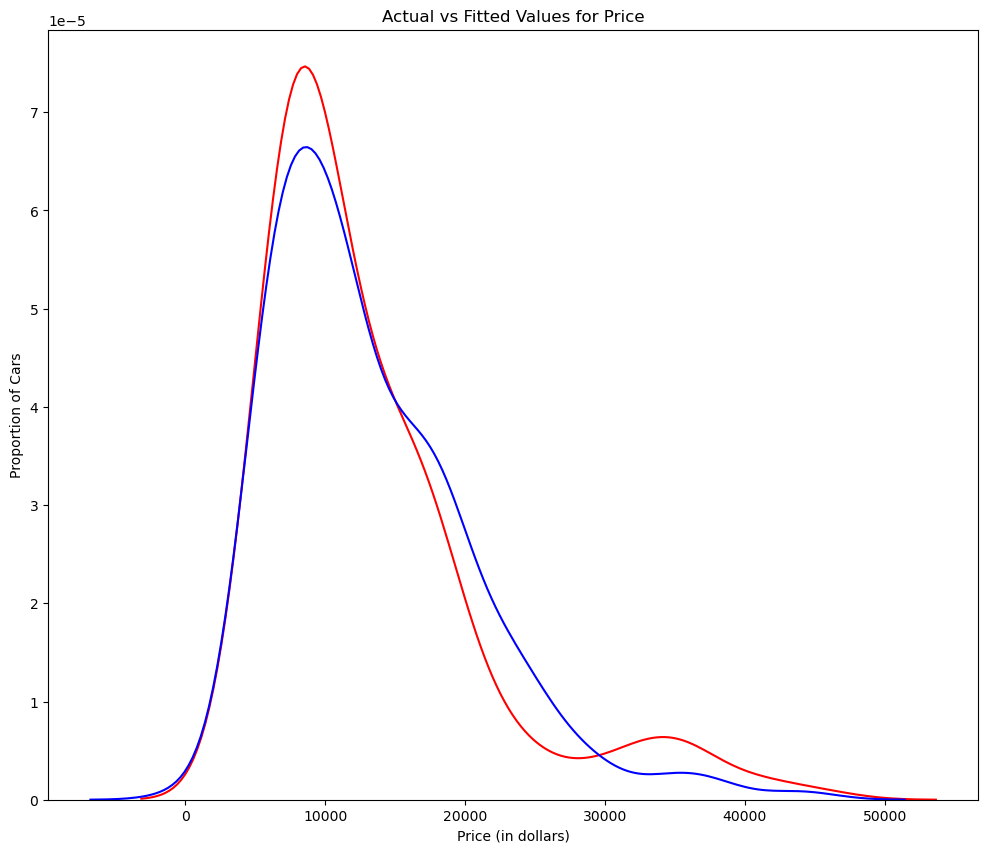

In [19]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [20]:
# We can see that the fitted values are reasonably close to the actual values since the two distributions
# overlap a bit. However, there is definitely some room for improvement.

# 3. Polynomial Regression and Pipelines
# Polynomial regression is a particular case of the general linear regression model or multiple linear regression 
# models.

# We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

# There are different orders of polynomial regression:

# We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the
# predictor variable. Let's see if we can try fitting a polynomial model to the data instead
# We will use the following function to plot the data:

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [21]:
x = df['highway-mpg']
y = df['price']

# Let's fit the polynomial using the function polyfit, then use the function poly1d to display the 
# polynomial function.
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


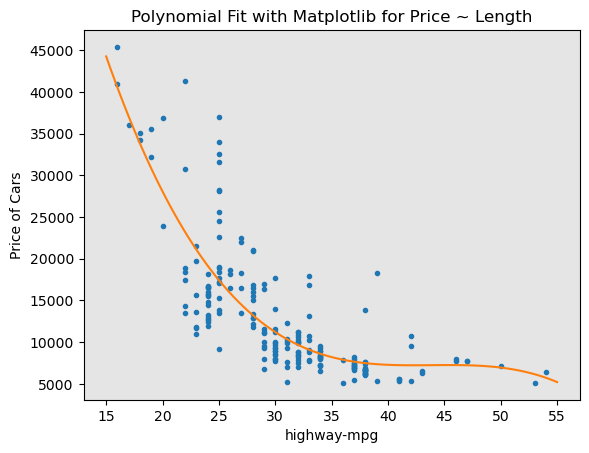

In [22]:
# Let's plot the function:
PlotPolly(p, x, y, 'highway-mpg')

In [23]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [24]:
# We can perform a polynomial transform on multiple features. First, we import the module:
from sklearn.preprocessing import PolynomialFeatures

# We create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [25]:
Z_pr=pr.fit_transform(Z)

# In the original data, there are 201 samples and 4 features.
Z.shape

(201, 4)

In [26]:
# After the transformation, there are 201 samples and 15 features.
Z_pr.shape

(201, 15)

In [27]:
# Pipeline¶

# Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline.
# We also use StandardScaler as a step in our pipeline.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# We create the pipeline by creating a list of tuples including the name of the model or estimator and 
# its corresponding constructor.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [28]:
# We input the list as an argument to the pipeline constructor:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [29]:
# First, we convert the data type Z to type float to avoid conversion warnings that may appear as a 
# result of StandardScaler taking float inputs.

# Then, we can normalize the data, perform a transform and fit the model simultaneously.

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [30]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [31]:
# 4. Measures for In-Sample Evaluation
# When evaluating our models, not only do we want to visualize the results, but we also want a quantitative 
# measure to determine how accurate the model is.

# Two very important measures that are often used in Statistics to determine the accuracy of a model are:

# R^2 / R-squared
# Mean Squared Error (MSE)
# R-squared

# R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the
# fitted regression line.

# The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a
# linear model.

# Mean Squared Error (MSE)

# The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual
# value (y) and the estimated value (ŷ).

# Model 1: Simple Linear Regression¶
# Let's calculate the R^2:

# highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

# We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

The R-square is:  0.4965911884339176


In [32]:
# Let's calculate the MSE:
# We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lm.predict(X)
print('The output of the first four predicted values is: ', Yhat[0:4])

The output of the first four predicted values is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [33]:
# Let's import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error

# We can compare the predicted results with the actual results:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [34]:
# Model 2: Multiple Linear Regression
# Let's calculate the R^2:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))
# We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

The R-square is:  0.8093562806577457


In [35]:
# Let's calculate the MSE.
# We produce a prediction:
Y_predict_multifit = lm.predict(Z)

In [36]:
# We compare the predicted results with the actual results:
    
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [37]:
# Model 3: Polynomial Fit¶
# Let's calculate the R^2.
# Let’s import the function r2_score from the module metrics as we are using a different function.
from sklearn.metrics import r2_score
# We apply the function to get the value of R^2:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
# We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

The R-square value is:  0.674194666390652


In [38]:
# MSE We can also calculate the MSE:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [39]:
# 5. Prediction and Decision Making

# Prediction
# In the previous section, we trained the model using the method fit. Now we will use the method predict 
# to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [40]:
# Create a new input:

new_input=np.arange(1, 100, 1).reshape(-1, 1)

# Fit the model:

lm.fit(X, Y)
lm

LinearRegression()

In [41]:
# Produce a prediction:
yhat=lm.predict(new_input)
yhat[0:5]

/home/lawrence/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

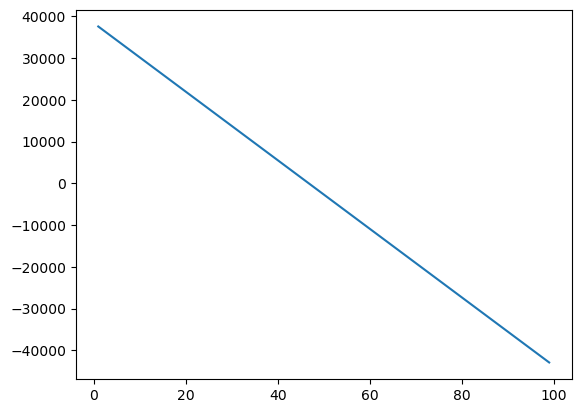

In [42]:
# We can plot the data:
plt.plot(new_input, yhat)
plt.show()

In [43]:
# Decision Making: Determining a Good Model Fit

# Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, 
# how do we determine a good model fit?

# What is a good R-squared value?
# When comparing models, the model with the higher R-squared value is a better fit for the data.

# What is a good MSE?
# When comparing models, the model with the smallest MSE value is a better fit for the data.

# Let's take a look at the values for the different models.

# Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
# R-squared: 0.49659118843391759
# MSE: 3.16 x10^7

# Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables 
#     of Price.
# R-squared: 0.80896354913783497
# MSE: 1.2 x10^7

# Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
# R-squared: 0.6741946663906514
# MSE: 2.05 x 10^7

In [44]:
# Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

# Usually, the more variables you have, the better your model is at predicting, but this is not always true. 
# Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not 
# be useful and even act as noise. As a result, you should always check the MSE and R^2.

# In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE
# to make the best conclusion about the fit of the model.

# MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.

# R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the 
# R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR 
#  (~0.809).

# This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to
# SLR.

In [45]:
# Simple Linear Model (SLR) vs. Polynomial Fit

# MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
# R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit
#  also brought up the R-squared quite a bit.

# Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better 
# fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

In [46]:
# Multiple Linear Regression (MLR) vs. Polynomial Fit

# MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
# R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

# Conclusion¶
# Comparing these three models, we conclude that the MLR model is the best model to be able to predict price 
# from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of 
# those variables are potential predictors of the final car price.

In [47]:
# Model Evaluation and Refinement¶
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df2 = pd.read_csv(path)

In [48]:
df2.to_csv('module_5_auto.csv')
df2.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [49]:
df2 = df2._get_numeric_data()
df2.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [50]:
# Libraries for plotting:
from ipywidgets import interact, interactive, fixed, interact_manual


In [73]:
# Functions for Plotting¶
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [52]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [53]:
# Part 1: Training and Testing
# An important step in testing your model is to split your data into training and testing data. We will place 
# the target data price in a separate dataframe y_data:
y_data = df2['price']

In [54]:
# Drop price data in dataframe x_data:

x_data=df2.drop('price',axis=1)

# Now, we randomly split our data into training and testing data using the function train_test_split.

from sklearn.model_selection import train_test_split

# The test_size parameter sets the proportion of data that is split into the testing set. In the above, the
# testing set is 10% of the total dataset.

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [55]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [56]:
from sklearn.linear_model import LinearRegression
# We create a Linear Regression object:
lre = LinearRegression()
# We fit the model using the feature "horsepower":
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [57]:
# Let's calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [58]:
# We can see the R^2 is much smaller using the test data compared to the training data.
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [59]:
# Find the R^2 on the test data using 40% of the dataset for testing.
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406974

In [60]:
# Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation.
# Let's go over several methods that you can use for cross-validation.
# Cross-Validation Score¶
# Let's import model_selection from the module cross_val_score.

from sklearn.model_selection import cross_val_score

# We input the object, the feature ("horsepower"), and the target data (y_data). 
# The parameter 'cv' determines the number of folds. In this case, it is 4.

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

# The default scoring is R^2. Each element in the array has the average R^2 value for the fold:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [61]:
# We can calculate the average and standard deviation of our estimate:
print("The mean of the folds is", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds is 0.522009915042119 and the standard deviation is 0.2911839444756029


In [62]:
# We can use negative squared error as a score by setting the parameter 'scoring' metric to 
# 'neg_mean_squared_error'.
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014932,
       17561927.72247591])

In [63]:
# Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the
# "horsepower" feature:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [64]:
# You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into 
# the specified number of folds, with one fold for testing and the other folds are used for training. First, 
# import the function:
from sklearn.model_selection import cross_val_predict

# We input the object, the feature "horsepower", and the target data y_data. The parameter 'cv' determines 
# the number of folds. In this case, it is 4. We can produce an output:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [65]:
# Part 2: Overfitting, Underfitting and Model Selection¶
# It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure 
# of how well your model performs in the real world. One reason for this is overfitting.

# Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and 
# Polynomial Regression so we will explore overfitting in that context.

# Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 
# 'engine-size' and 'highway-mpg' as features.
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [66]:
# Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [67]:
# Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [68]:
# Let's perform some model evaluation using our training and testing data separately. 
# First, we import the seaborn and matplotlib library for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/home/lawrence/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/lawrence/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


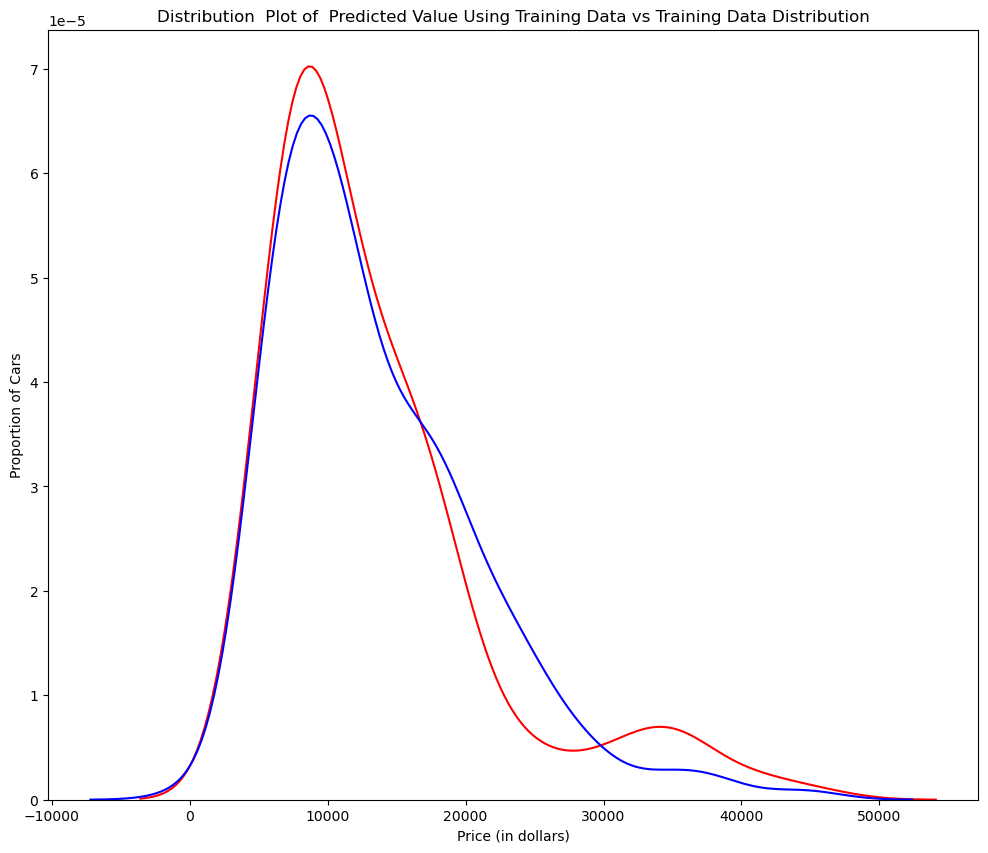

In [74]:
# Let's examine the distribution of the predicted values of the training data.
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/home/lawrence/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/lawrence/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


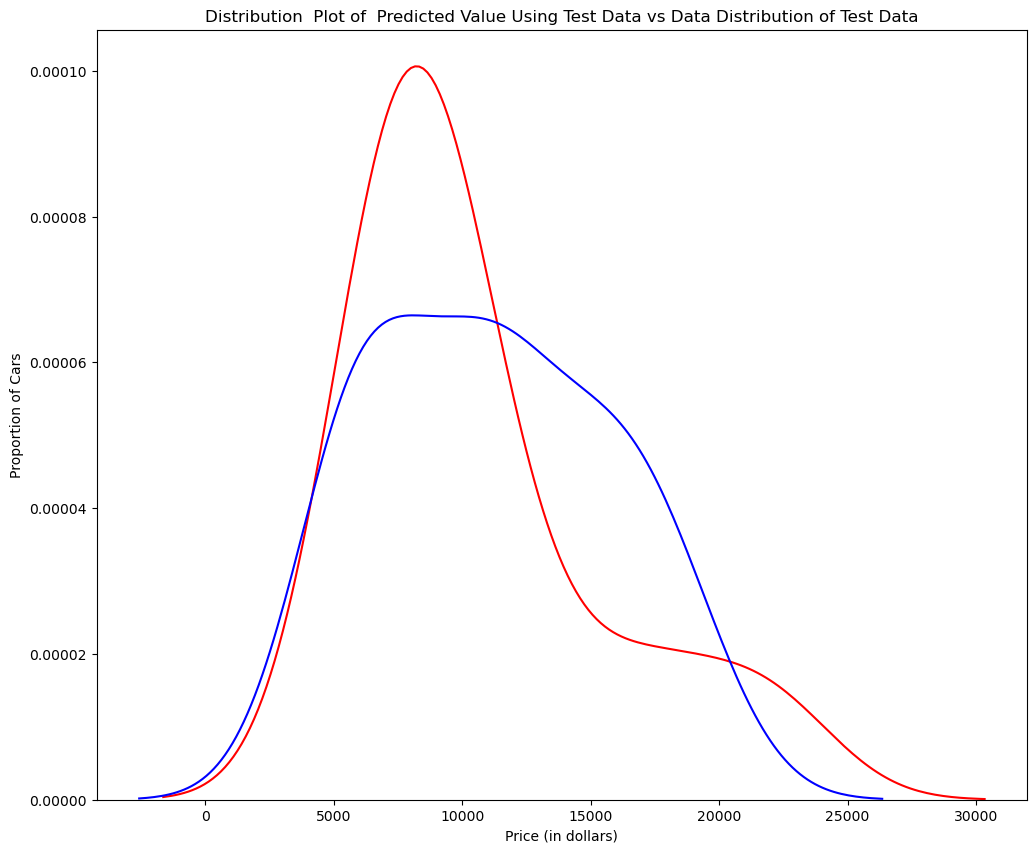

In [75]:
# Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.

# So far, the model seems to be doing well in learning from the training dataset. But what happens when the model
# encounters new data from the testing dataset? When the model generates new values from the test data, we see the
# distribution of the predicted values is much different from the actual target values.

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [76]:
# Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.
# Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much
# better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is
# where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a
# drop in the prediction accuracy when analysing the test dataset.

from sklearn.preprocessing import PolynomialFeatures

In [77]:
# Overfitting
# Overfitting occurs when the model fits the noise, but not the underlying process. 
# Therefore, when testing your model using the test set, your model does not perform as well since it is
# modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial
# model.

# Let's use 55 percent of the data for training and the rest for testing:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [78]:
# We will perform a degree 5 polynomial transformation on the feature 'horsepower'.
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [79]:
# Now, let's create a Linear Regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [80]:
# We can see the output of our model using the method "predict." We assign the values to "yhat".
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.60486749,  7307.93778255, 12213.74792967, 18893.34125061,
       19996.06555028])

In [81]:
# Let's take the first five predicted values and compare it to the actual targets.
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.60486749  7307.93778255 12213.74792967 18893.34125061]
True values: [ 6295. 10698. 13860. 13499.]


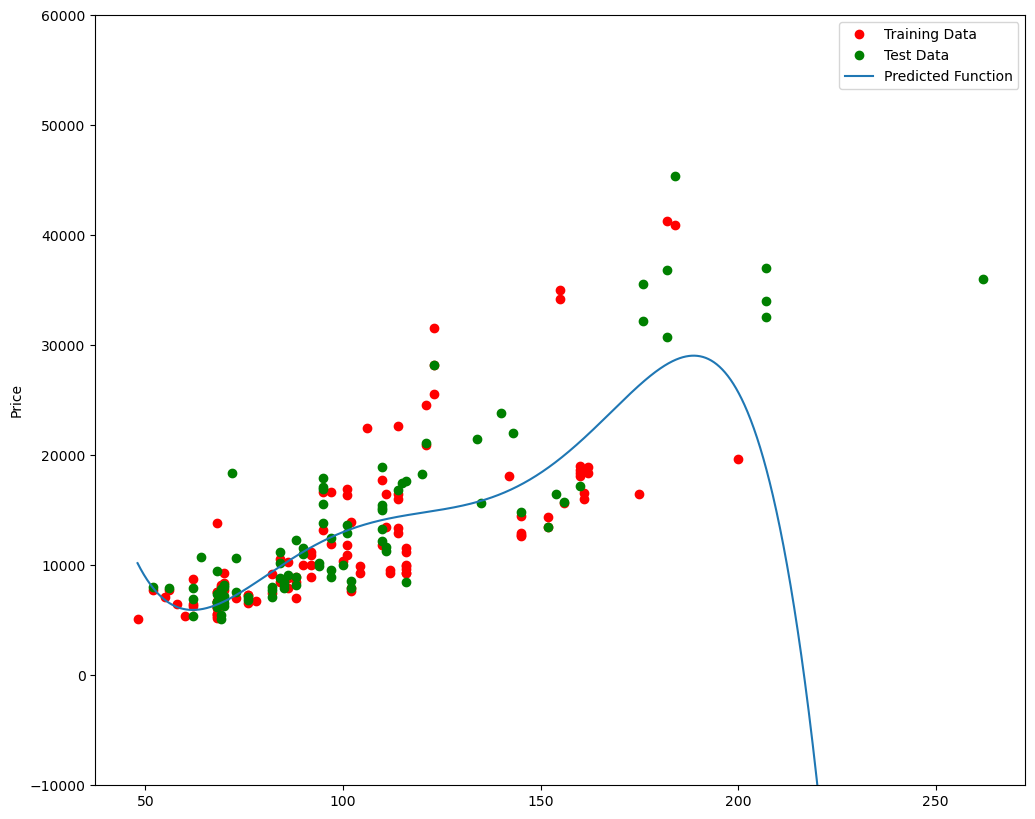

In [82]:
# We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data,
# testing data, and the predicted function.
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [83]:
# Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, 
# and the blue line represents the model prediction.

# We see that the estimated function appears to track the data but around 200 horsepower, the function begins
# to diverge from the data points.

# R^2 of the training data:
poly.score(x_train_pr, y_train)

0.5567716898927437

In [84]:
# R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.871035846525604

Text(3, 0.75, 'Maximum R^2 ')

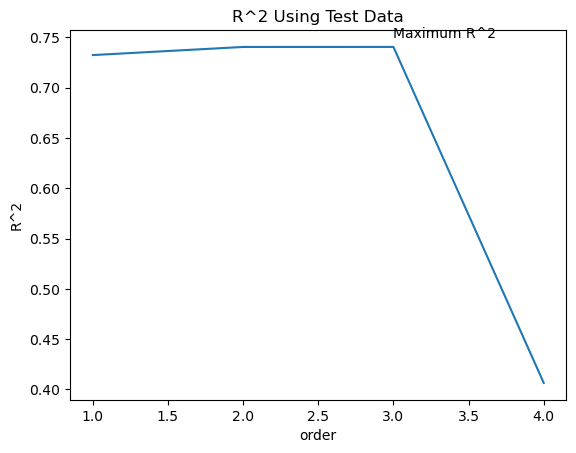

In [85]:
# We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2,
# the worse the model. A negative R^2 is a sign of overfitting.
# Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')  

In [86]:
# We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically
# decreases at an order four polynomial.

# The following function will be used in the next section. Please run the cell below.
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [87]:
# The following interface allows you to experiment with different polynomial orders and different amounts of data
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [91]:
# We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object 
# "pr1" of degree two.
pr1=PolynomialFeatures(degree=2)

# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and
# 'highway-mpg'. Hint: use the method "fit_transform".

x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


In [92]:
# How many dimensions does the new feature have? Hint: use the attribute "shape".
x_train_pr1.shape #there are now 15 features

(110, 15)

In [93]:
# Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.
poly1=LinearRegression().fit(x_train_pr1,y_train)

/home/lawrence/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/lawrence/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


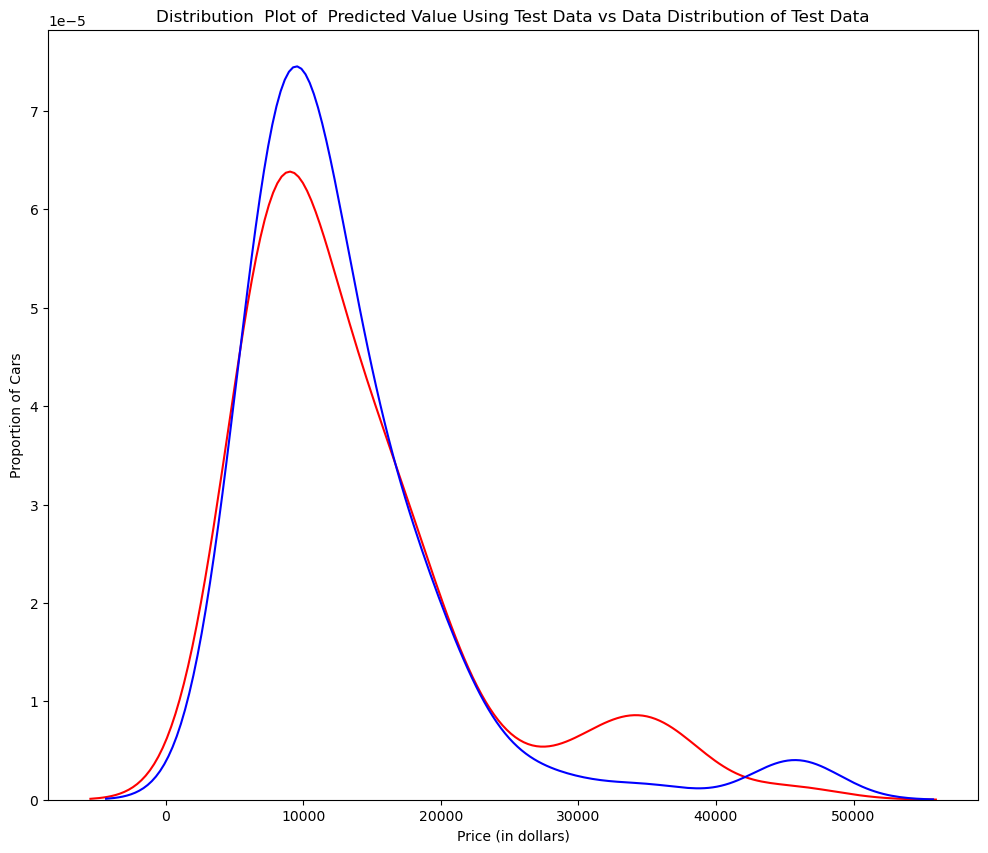

In [94]:
# Use the method "predict" to predict an output on the polynomial features, then use the function
# "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.

yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [ ]:
# Using the distribution plot above, describe (in words) the two regions where the predicted prices are 
# less accurate than the actual prices.

#The predicted value is higher than actual value for cars where the price $10,000 range, 
# conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model
# is not as accurate in these ranges.

In [95]:
# Part 3: Ridge Regression

# In this section, we will review Ridge Regression and see how the parameter alpha changes the model. 
# Just a note, here our test data will be used as validation data.
# Let's perform a degree two polynomial transformation on our data.
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [96]:
# Let's import Ridge from the module linear models.
from sklearn.linear_model import Ridge

# Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1

RigeModel=Ridge(alpha=1)

# Like regular regression, you can fit the model using the method fit.

RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [102]:
# Similarly, you can obtain a prediction:
yhat = RigeModel.predict(x_test_pr)

# Let's compare the first five predicted samples to our test set:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322738 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [103]:
# We select the value of alpha that minimizes the test error. To do so, we can use a for loop. 
# We have also created a progress bar to see how many iterations we have completed so far.
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:04<00:00, 231.46it/s, Test Score=0.564, Train Score=0.859]


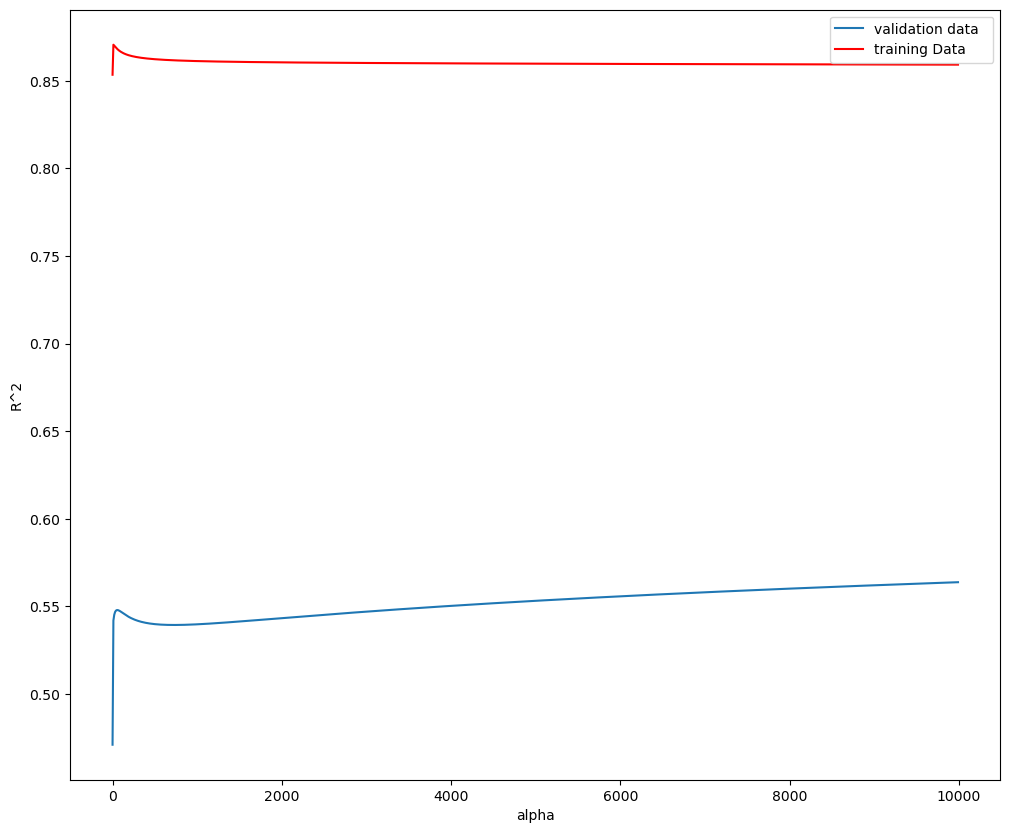

In [104]:
# We can plot out the value of R^2 for different alphas:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [105]:
# Figure 4: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of 
# the training data. The x-axis represents the different values of Alpha.

# Here the model is built and tested on the same data, so the training and test data are the same.

# The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. 
# Therefore, as alpha increases, the model performs worse on the training data

# The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and
# converges at a point.

# Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the 
# model and use the test data to test the model. The parameter alpha should be set to 10.
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)


0.5418576440211109

In [106]:
# Part 4: Grid Search¶

# The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best
# hyperparameter simpler.

# Let's import GridSearchCV from the module model_selection.

from sklearn.model_selection import GridSearchCV
# We create a dictionary of parameter values:

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1


[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [107]:
# Create a Ridge regression object:
RR=Ridge()
RR

Ridge()

In [109]:
# Create a ridge grid search object:
# Grid1 = GridSearchCV(RR, parameters1,cv=4, iid=None)
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [110]:
# In order to avoid a deprecation warning due to the iid parameter, we set the value of iid to "None".
# Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [111]:
# The object finds the best parameter values on the validation data. We can obtain the estimator with the
# best parameters and assign it to the variable BestRR as follows:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [112]:
# We now test our model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.841164983103615

In [118]:
# Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of 
# the parameters

parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_




Ridge(alpha=10000)